A Jupyter notebook to take mobile phone specifications and perform classification according to price range using a test-train split. The test/train ratio is then varied to produce a learning curve to assess classifier performance for different training dataset size.

    -    Aidan Burt

In [35]:
# Load in the CSV data

import pandas as pd
data = pd.read_csv('mobile_phones.csv')

# display first five rows
display(data.head())


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [36]:
# import multi-class naive Bayes classifier from sklearn

from sklearn.naive_bayes import GaussianNB


In [37]:
import numpy as np

# assign 'price_range' column to be used for classification
y = data[['price_range']]

# use all data except price range to perform the classification
x = data.drop('price_range', axis=1)


In [38]:
# perform a train test split - 80% of data for training, and 20% of data for the testing dataset

import sklearn.model_selection

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.20)



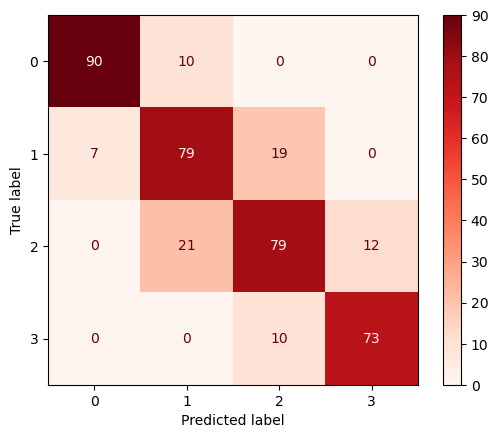

In [39]:
# plot a confusion matrix for naive Bayes classifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

m = GaussianNB()

m.fit(x_train, y_train.values.ravel())

y_pred = m.predict(x_test)

cm = confusion_matrix(y_test, y_pred, labels=m.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=m.classes_)
disp.plot(cmap='Reds')
plt.show()



In [40]:
# print the accuracy for naive Bayes classifier

R2_NB = m.score(x_test,y_test)

print('Naive Bayes Accuracy - ' + str(R2_NB))


Naive Bayes Accuracy - 0.8025


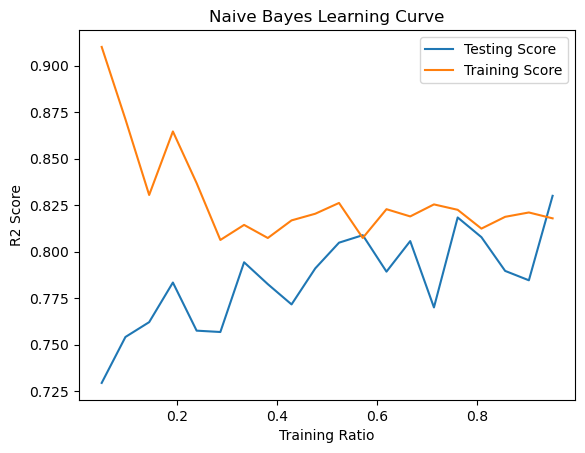

In [41]:
# iterate through a range of train/test ratios and get accuracy, to plot a learning curve manually

ratios = np.linspace(0.05,0.95,20)

R2_NB_arr = np.empty(ratios.shape)

R2_NB_arr_tr = np.empty(ratios.shape)

for ind in range(len(ratios)):
   
    this_x_train, this_x_test, this_y_train, this_y_test = sklearn.model_selection.train_test_split(x, y, train_size=ratios[ind])
    
    m2 = GaussianNB()
    m2.fit(this_x_train, this_y_train.values.ravel())
    
    R2_NB_arr[ind] = m2.score(this_x_test,this_y_test)

    R2_NB_arr_tr[ind] = m2.score(this_x_train,this_y_train)

plt.plot(ratios,R2_NB_arr)  
plt.plot(ratios,R2_NB_arr_tr)  
plt.legend(['Testing Score','Training Score'])
plt.title('Naive Bayes Learning Curve')
plt.xlabel('Training Ratio')
plt.ylabel('R2 Score')

plt.show()


In [42]:
# Apply the learning_curves() function from sklearn to see how it compares

train_sizes_NB, train_scores_NB, test_scores_NB = sklearn.model_selection.learning_curve(m, x, y.values.ravel(), train_sizes=ratios)



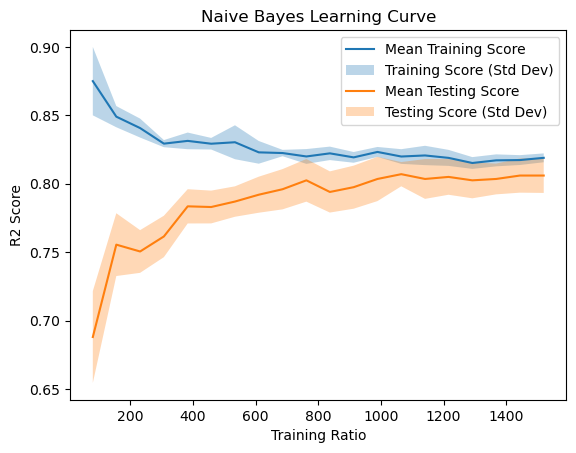

In [43]:
# create plot of learning curve via sklearn's own function

fig, axs = plt.subplots(1)

axs.plot(train_sizes_NB,np.mean(train_scores_NB,axis=1))  
axs.fill_between(
        train_sizes_NB,
        train_scores_NB.mean(axis=1) - train_scores_NB.std(axis=1),
        train_scores_NB.mean(axis=1) + train_scores_NB.std(axis=1),
        alpha=0.3,
    )

axs.plot(train_sizes_NB,np.mean(test_scores_NB,axis=1))
axs.fill_between(
        train_sizes_NB,
        test_scores_NB.mean(axis=1) - test_scores_NB.std(axis=1),
        test_scores_NB.mean(axis=1) + test_scores_NB.std(axis=1),
        alpha=0.3,
    )

axs.set_title('Naive Bayes Learning Curve')
axs.set_xlabel('Training Ratio')
axs.set_ylabel('R2 Score')
axs.legend(['Mean Training Score','Training Score (Std Dev)','Mean Testing Score','Testing Score (Std Dev)'])
